# I-94 Interstate Highway Traffic Volume Analysis

## Overview

This project aims to analyze the traffic volume on the I-94 Interstate high es. The analysis covers various aspects, including:

1. **Traffic Volume Comparison**: Comparing traffic volumes during day and night.
2. **Time Indicators**: Investigating how holidays, time of the day, and months affect traffic.
3. **Weather Conditions**: Exploring the impact of different weather conditions on traffic volume.

## Dataset

The dataset used for this analysis is sourced from a Metro Interstate Traffic Volume dataset, which includes hourly traffic volume reported between 2012 and 2018, along with weather and holiday Author

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [91]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [92]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


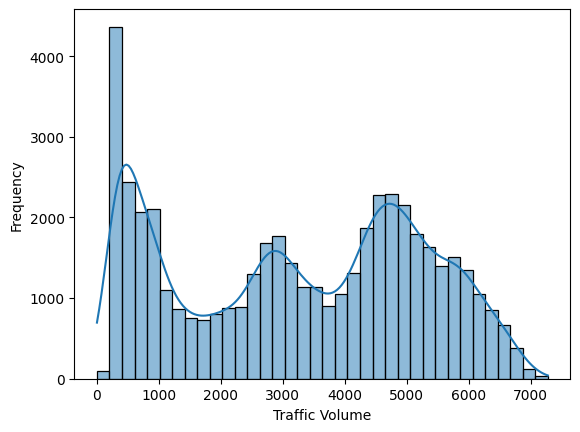

In [93]:
# sns.set_theme()
sns.histplot(traffic["traffic_volume"], kde=True)
plt.ylabel("Frequency")
plt.xlabel("Traffic Volume")
plt.show()

In [94]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Traffic Volume Analysis Between 2012 and 2018

The dataset captures the hourly traffic volume at a given station between October 2, 2012, and September 30, 2018. Here are some key insights based on the data:

1. **Range of Traffic**: 
   - The number of cars passing the station each hour varied from as low as 0 to as high as 7,280.
  
2. **Average Traffic**: 
   - On average, approximately 3,260 cars passed the station every hour.

3. **Variability**: 
   - The standard deviation of about 1,987 indicates a high variability in traffic volume. This could be due to various factors such as time of day, day of the week, or seasonal variations.

4. **Lower Quartile**: 
   - About 25% of the time, there were 1,193 cars or fewer passing the station each hour. This low volume likely occurs during the night or during road construction periods.

5. **Upper Quartile**: 
   - Conversely, in about 25% of the cases, the traffic volume was much higher, with 4,933 cars or more. This is likely during peak hours or special events.

## Traffic Volume: Day vs. Night

**dividing the dataset into two parts:**
- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [95]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [96]:
# Function to categorize time into Day and Night
def day_night(hour):
    if 7 <= hour < 19:
        return "Day"
    else:
        return "Night"

# Apply the function to categorize time
traffic["day_night"] = traffic["date_time"].dt.hour.apply(day_night)

# Filter data for Day and Night
day_data = traffic[traffic["day_night"] == "Day"]
night_data = traffic[traffic["day_night"] == "Night"]

# Display the shape of the filtered datasets (useful for debugging)
print(f"Day data shape: {day_data.shape}")
print(f"Night data shape: {night_data.shape}")

Day data shape: (23877, 10)
Night data shape: (24327, 10)


In [97]:
day_data["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [98]:
night_data["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

#### Observations:

1. **Day Time Traffic**: 
    - There are 4,252 or more cars passing the station each hour 75% of the time.
<br>
<br>
2. **Night Time Traffic**: 
    - There are 2819 or fewer cars passing the station each hour 75% of the time.
<br>
#### Next Steps:
- Plotting a histogram table to visualize better Day vs Night.

## Traffic Volume: Day vs. Night (II)

Now that we've isolated `day` and ``night``, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

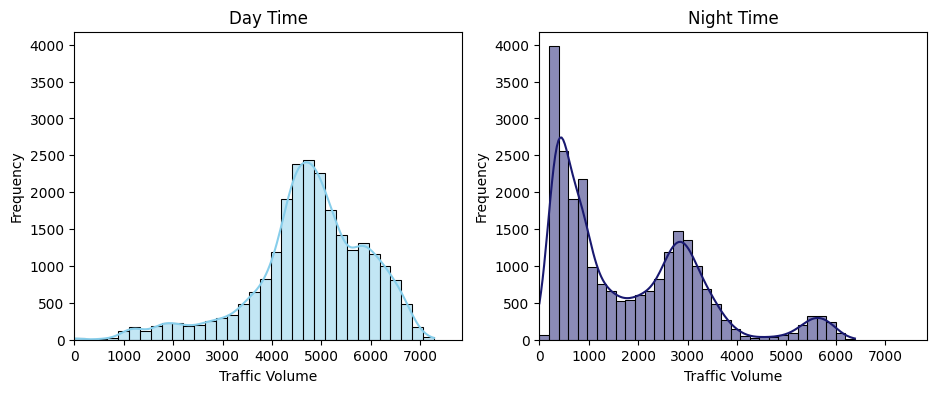

In [99]:
plt.figure(figsize=(11, 4))

# Day Time Traffic Volume:
day_plot = plt.subplot(1, 2, 1)
sns.histplot(day_data["traffic_volume"], bins=33, kde=True, color="skyblue")
day_plot.set_title("Day Time")
day_plot.set_xlabel("Traffic Volume")
day_plot.set_ylabel("Frequency")

# Night Time Traffic Volume:
night_plot = plt.subplot(1, 2, 2)
sns.histplot(night_data["traffic_volume"], bins=33, kde=True, color="midnightblue")
night_plot.set_title("Night Time")
night_plot.set_xlabel("Traffic Volume")
night_plot.set_ylabel("Frequency")

# Synchronize the x-axis and y-axis limits
x_max = max(day_plot.get_xlim()[1], night_plot.get_xlim()[1])
y_max = max(day_plot.get_ylim()[1], night_plot.get_ylim()[1])

day_plot.set_xlim(0, x_max + 200)
night_plot.set_xlim(0, x_max + 200)

day_plot.set_ylim(0, y_max)
night_plot.set_ylim(0, y_max)

plt.show()

#### Observations:

1. **Day Time Traffic**: 
    - The histogram is left-skewed, indicating that higher volumes of traffic are more common during the day.
    - The Kernel Density Estimation (KDE) also suggests that the traffic often peaks around 5,000 cars per hour.
<br>
<br>
2. **Night Time Traffic**: 
    - The histogram is right-skewed, which suggests that lower traffic volumes are more common during the night.
    - The KDE shows a significant peak in the 0-1000 cars range, indicating that lower volumes of traffic are particularly common during the night
<br>
<br>
#### Next Steps:

- Given that heavy traffic is more common during the day, the subsequent analysis will focus primarily on daytime data..


## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

- Month
- Day of the week
- Time of day

In [100]:
# Create a new DataFrame to avoid SettingWithCopyWarning
day_data_modified = day_data.copy()

# Add a new 'month' column
day_data_modified["month"] = day_data_modified["date_time"].dt.month

# Group by month and calculate the mean traffic volume
by_month = day_data_modified.groupby("month")
mean_traffic_by_month = by_month["traffic_volume"].mean()

mean_traffic_by_month

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

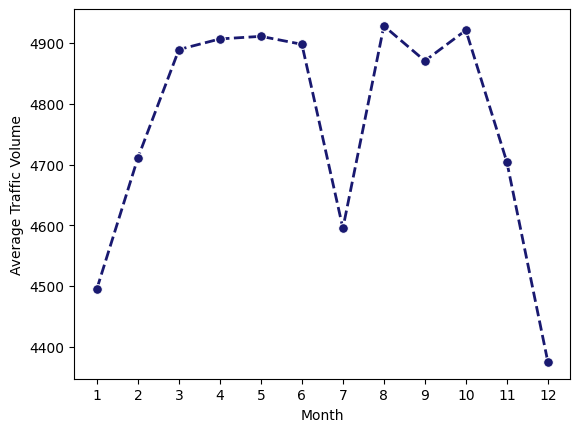

In [101]:
sns.lineplot(mean_traffic_by_month, color="midnightblue", linestyle="--", linewidth=2, marker="o", markersize=7)

plt.xticks(mean_traffic_by_month.index)
plt.xlabel("Month")
plt.ylabel("Average Traffic Volume")

plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

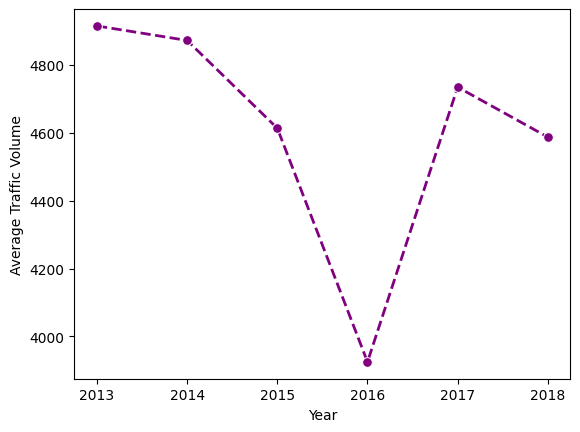

In [102]:
day_data_modified["year"] = day_data_modified["date_time"].dt.year
july = day_data_modified[day_data_modified["month"] == 7]
july_by_year = july.groupby("year")
mean_july_by_year = july_by_year["traffic_volume"].mean()
sns.lineplot(mean_july_by_year ,color='purple', linestyle='--', linewidth=2, marker='o', markersize=7)

plt.xlabel("Year")
plt.ylabel("Average Traffic Volume")

plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

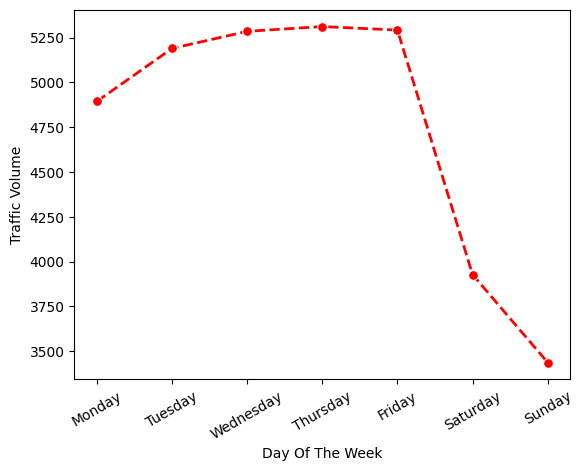

In [103]:
day_data_modified["dayofweek"] = day_data_modified["date_time"].dt.dayofweek
by_dayofweek = day_data_modified.groupby("dayofweek")["traffic_volume"].mean()

sns.lineplot(by_dayofweek, color="red", linestyle="--", linewidth=2, marker="o", markersize=7)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=30)
plt.xlabel("Day Of The Week")
plt.ylabel("Traffic Volume")
plt.show()

Traffic volume is significantly heavier on business days. Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values under 4,000 cars.

## Time Indicators (III)

In [104]:
day_data_modified["hour"] = day_data_modified["date_time"].dt.hour
bussiness_days = day_data_modified[day_data_modified["dayofweek"] <= 4]
weekend = day_data_modified[day_data_modified["dayofweek"] > 4]

by_hour_bussiness = bussiness_days.groupby("hour")
by_hour_weekend = weekend.groupby("hour")

bussiness_days_hourly_mean = by_hour_bussiness["traffic_volume"].mean()
weekend_hourly_mean = by_hour_weekend["traffic_volume"].mean()
print(f"Bussiness Days: \n{bussiness_days_hourly_mean}")
print(f"Weekend: \n{weekend_hourly_mean}")

Bussiness Days: 
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
Weekend: 
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


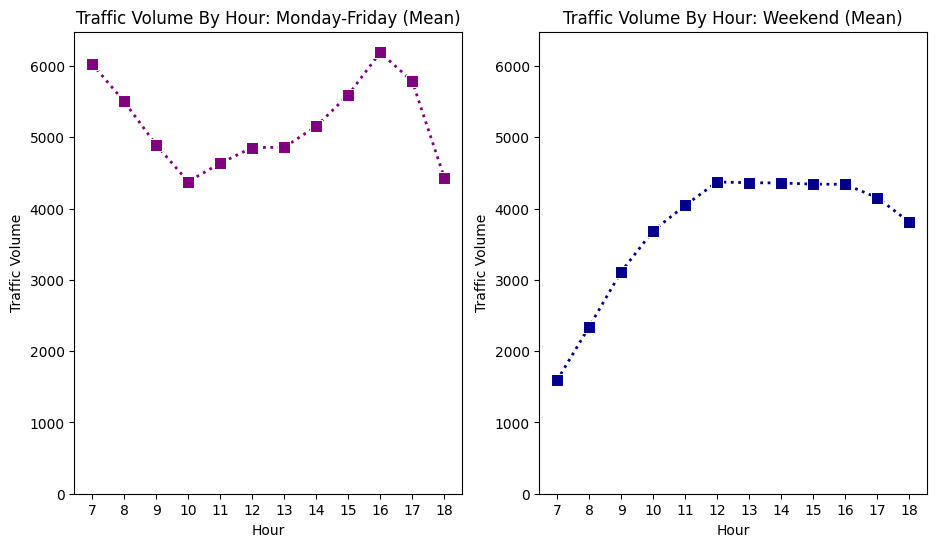

In [105]:
plt.figure(figsize=(11, 6))

# 1st plot --> Traffic Volume By Hour: Monday-Friday
bussiness_days_plot = plt.subplot(1, 2, 1)
sns.lineplot(bussiness_days_hourly_mean, color="purple", linestyle=":", linewidth=2, marker="s", markersize=8)
bussiness_days_plot.set_xticks(bussiness_days_hourly_mean.index)
bussiness_days_plot.set_title("Traffic Volume By Hour: Monday-Friday (Mean)")
bussiness_days_plot.set_xlabel("Hour")
bussiness_days_plot.set_ylabel("Traffic Volume")

# 2nd plot --> Traffic Volume By Hour: Weekend
weekend_plot = plt.subplot(1, 2, 2)
sns.lineplot(weekend_hourly_mean, color="darkblue", linestyle=":", linewidth=2, marker="s", markersize=8)
weekend_plot.set_xticks(weekend_hourly_mean.index)
weekend_plot.set_title("Traffic Volume By Hour: Weekend (Mean)")
weekend_plot.set_xlabel("Hour")
weekend_plot.set_ylabel("Traffic Volume")


# Synchronize the y-axis limits
y_max = max(bussiness_days_plot.get_ylim()[1], weekend_plot.get_ylim()[1])

bussiness_days_plot.set_ylim(0, y_max + 200)
weekend_plot.set_ylim(0, y_max + 200)

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

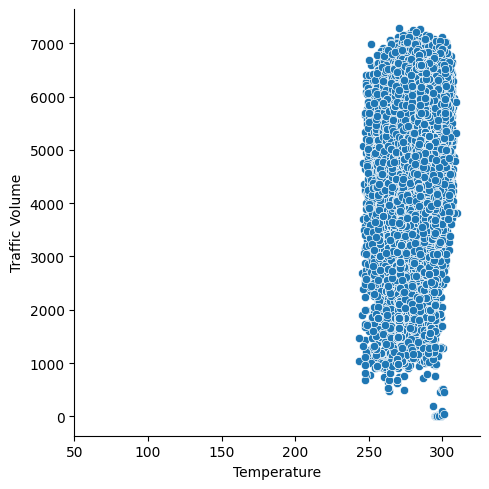

In [106]:
sns.relplot(data=day_data_modified, x="temp", y="traffic_volume")
plt.xlim(50, plt.xlim()[1]) # two wrong 0K temperatures mess up the x-axis
plt.xlabel("Temperature")
plt.ylabel("Traffic Volume")
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

## Weather Types

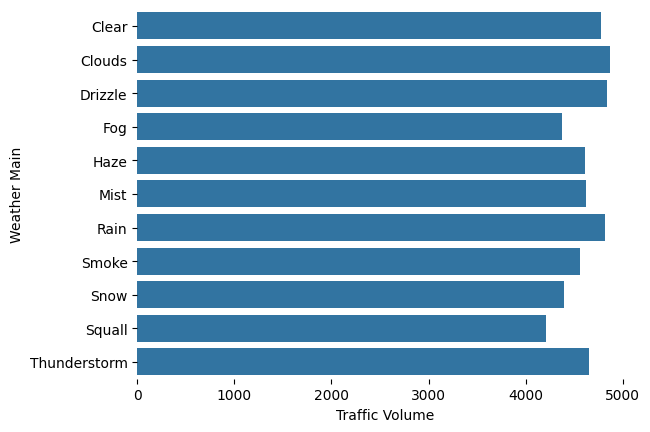

In [107]:
by_weather_main = day_data_modified.groupby("weather_main")["traffic_volume"].mean()
by_weather_main = by_weather_main.reset_index()
sns.barplot(data=by_weather_main, x="traffic_volume", y="weather_main")
sns.despine(left=True, bottom=True)
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Main")

plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more detailed weather classification.

Text(0, 0.5, 'Weather (Detailed)')

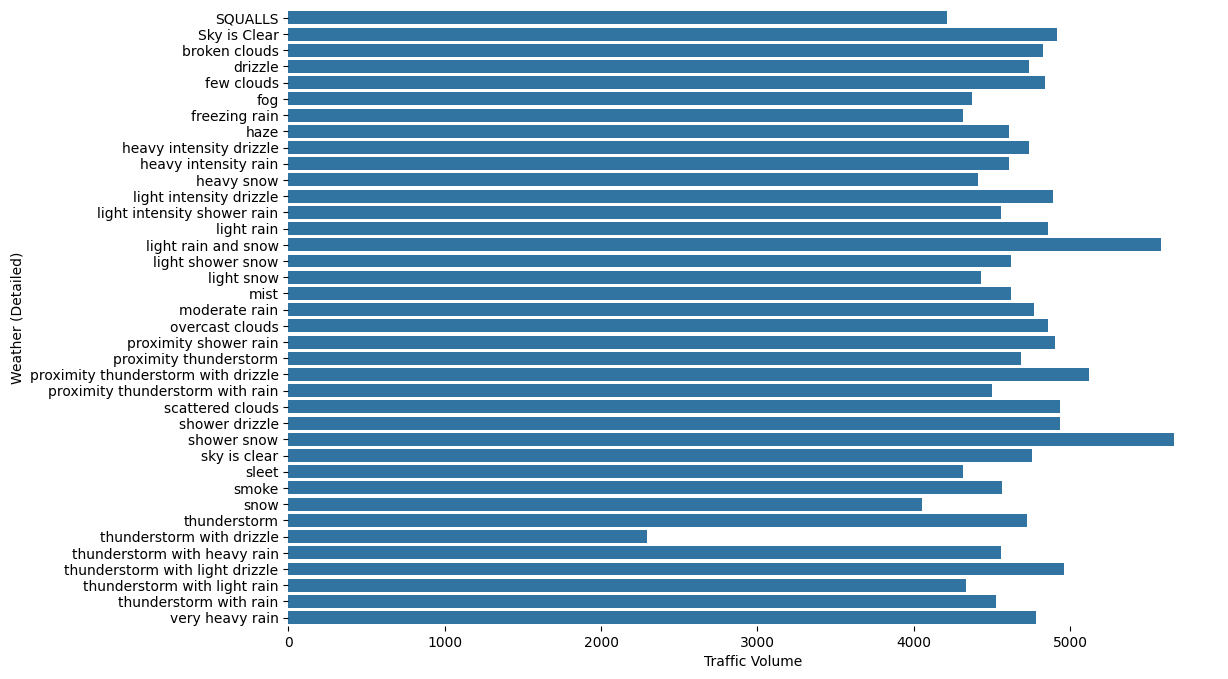

In [108]:
plt.figure(figsize=(12, 8))
by_weather_description = day_data_modified.groupby("weather_description")["traffic_volume"].mean()
by_weather_description = by_weather_description.reset_index()
sns.barplot(data=by_weather_description,x="traffic_volume", y="weather_description")
sns.despine(left=True, bottom=True)
plt.xlabel("Traffic Volume")
plt.ylabel("Weather (Detailed)")

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

## Conclusion
We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle